# Kepler's orbits

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from convert_kepler_data import read_kepler_data

In [3]:
kepler_data = read_kepler_data('kepler11data.txt')
kepler_data

array([(902., b'Kepler-11 ', b'b', 6.,  10.3039, 0.0006, -0.001 , 0.091, 0.001, 0.045,  6.8e-02, -4.2e-02, 89.64, 0.36, -0.18, 0.006,  4.e-03, -3.e-03, b' Mass', 0.961, 0.025, 1.065, 0.017, -0.022, 689.7378, 0.0026, -0.0047),
       (903., b'Kepler-11 ', b'c', 6.,  13.0241, 0.0013, -0.0008, 0.107, 0.001, 0.026,  6.3e-02, -1.3e-02, 89.59, 0.41, -0.16, 0.009,  9.e-03, -5.e-03, b' Mass', 0.961, 0.025, 1.065, 0.017, -0.022, 683.3494, 0.0014, -0.0019),
       (904., b'Kepler-11 ', b'd', 6.,  22.6845, 0.0009, -0.0009, 0.155, 0.001, 0.004,  7.0e-03, -2.0e-03, 89.67, 0.13, -0.16, 0.023,  3.e-03, -5.e-03, b' Mass', 0.961, 0.025, 1.065, 0.017, -0.022, 694.0069, 0.0022, -0.0014),
       (905., b'Kepler-11 ', b'e', 6.,  31.9996, 0.0008, -0.0012, 0.195, 0.002, 0.012,  6.0e-03, -6.0e-03, 88.89, 0.02, -0.02, 0.025,  5.e-03, -7.e-03, b' Mass', 0.961, 0.025, 1.065, 0.017, -0.022, 695.0755, 0.0015, -0.0009),
       (906., b'Kepler-11 ', b'f', 6.,  46.6888, 0.0027, -0.0032, 0.25 , 0.002, 0.013,  1.1e-02,

In [4]:
kepler_data['ecc']

array([0.045, 0.026, 0.004, 0.012, 0.013, 0.15 ], dtype=float32)

In [5]:
# use another function to convert this dataset into initial conditions
#  that the hermite solver is used to
from convert_kepler_data import convert_kepler_data

In [6]:
star_mass, \
planet_mass, \
planet_initial_position, \
planet_initial_velocity, ecc = convert_kepler_data(kepler_data)

In [7]:
star_mass

0.961

In [8]:
planet_mass

array([0.006, 0.009, 0.023, 0.025, 0.006, 0.079])

In [9]:
planet_initial_position

array([[-0.086905  ,  0.        ,  0.        ],
       [-0.10403253,  0.00621482,  0.        ],
       [ 0.05845548,  0.14288506,  0.        ],
       [ 0.09618447,  0.16693238,  0.        ],
       [-0.18899676, -0.15863728,  0.        ],
       [ 0.38691949,  0.08478507,  0.        ]])

In [10]:
planet_initial_velocity

array([[  0.        , -94.86040956,   0.        ],
       [ -5.26838804, -88.18973123,   0.        ],
       [-68.7010871 ,  28.10619444,   0.        ],
       [-57.11027186,  32.90626575,   0.        ],
       [ 37.40594847, -44.56457532,   0.        ],
       [ -8.46515754,  38.63103006,   0.        ]])

In [11]:
# use hermite solver to solve these
from hermite_library import do_hermite
r_h, v_h, t_h, E_h = do_hermite(star_mass, 
                               planet_mass,
                               planet_initial_position, 
                               planet_initial_velocity, 
                               tfinal=1e7, Nsteps=5000)

In [12]:
r_h.shape

(7, 3, 5000)

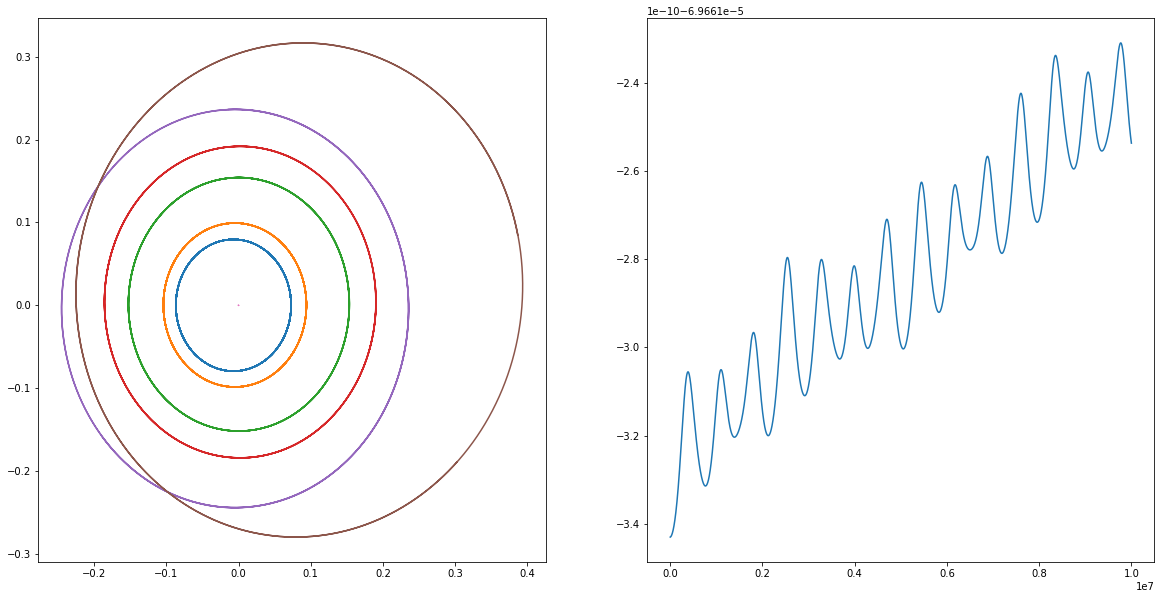

In [13]:
# we'll plot this
fig, ax = plt.subplots(1, 2, figsize=(10*2, 10))

# loop over the number of particles in this sim
# coordinate plot
for i in range(r_h.shape[0]):
    ax[0].plot(r_h[i,0,:], r_h[i, 1, :])
    
# energy plot
ax[1].plot(t_h, E_h)

plt.show()

# practice saving stuff

In [14]:
from hermite_library import save_hermite_solution_to_file

In [15]:
save_hermite_solution_to_file('myPlanetSystem_kepler11_solution1.txt',
                             t_h, E_h, r_h, v_h)

In [138]:
from hermite_library import read_hermite_solution_from_file

In [139]:
t_h2, E_h2, r_h2, v_h2 = read_hermite_solution_from_file('myPlanetSystem_kepler101_solution1.txt')

In [140]:
r_h2

array([[[-4.33185231e-02, -4.32687938e-02, -4.31196692e-02, ...,
         -3.08571374e-02, -3.23171642e-02, -3.36947781e-02],
        [-1.10710766e-07, -1.89638631e-03, -3.78830524e-03, ...,
          2.78959500e-02,  2.65522997e-02,  2.51409226e-02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 6.70290022e-02,  6.66797942e-02,  6.62916908e-02, ...,
          1.20022648e-02,  1.03755253e-02,  8.74278392e-03],
        [ 1.36510437e-02,  1.52658526e-02,  1.68717563e-02, ...,
          6.75428886e-02,  6.78085016e-02,  6.80348994e-02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 5.07810205e-06,  5.07448076e-06,  5.05827564e-06, ...,
          3.90721907e-06,  4.10989277e-06,  4.30191980e-06],
        [-1.10710766e-07,  1.22285776e-07,  3.54789151e-07, ...,
         -4.16812234e-06, -3.99590079e-06, -3.814

### Exercise
Re-do with Kepler-11 dataset.

# INTO 3D FINALLY!  Hurray.

First doing this "by hand":

In [141]:
star_mass = 1.0 # Msun
planet_mass = np.array([1.0, 0.5]) # in Mjupiter

# initial positions in 3D
planet_initial_position = np.array([[1.0, 0.0, 1.0],
                                   [1.0, 0.0, 0.0]])

# velocities in 3D
planet_initial_velocity = np.array([[0.0, 35, 0],
                                   [35.0, 0, 0]])

# star is assumed to be at the center with zero velocity

In [142]:
r_h, v_h, t_h, E_h = do_hermite(star_mass,
                               planet_mass,
                               planet_initial_position,
                               planet_initial_velocity,
                               tfinal=1e10, Nsteps=5000,
                               threeDee=True)

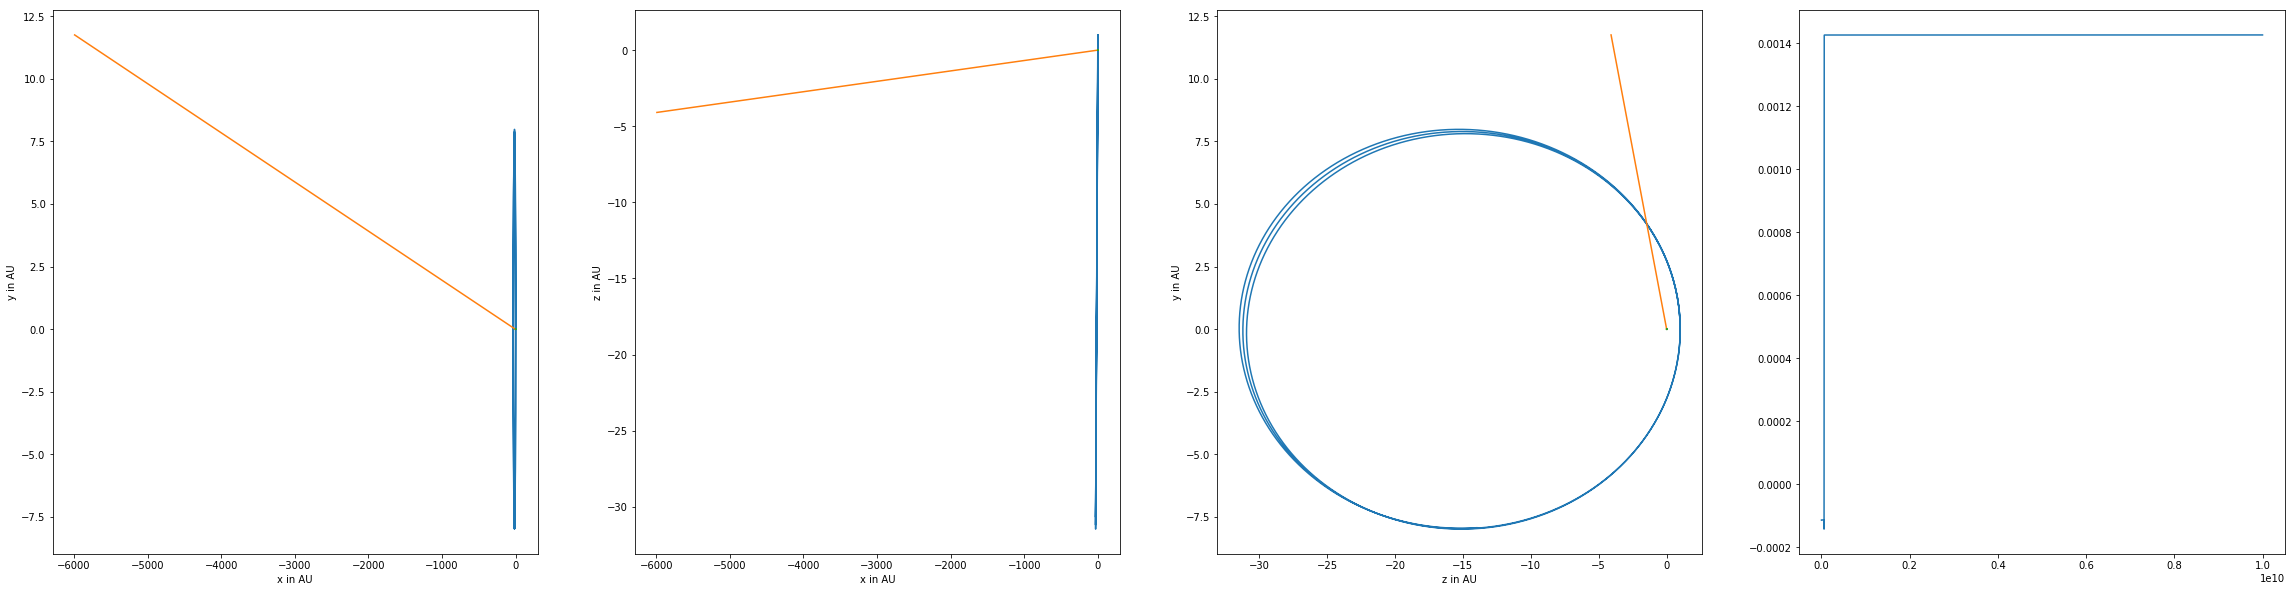

In [143]:
# we'll plot this
fig, ax = plt.subplots(1, 4, figsize=(10*4, 10))

# my X vs. Y plot
# loop over the number of particles in this sim
# coordinate plot
for i in range(r_h.shape[0]):
    ax[0].plot(r_h[i,0,:], r_h[i, 1, :])
# label my axis
ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')
  
# my Z vs. Y plot
# loop over the number of particles in this sim
# coordinate plot
for i in range(r_h.shape[0]): # looping over number of planets
    ax[1].plot(r_h[i,0,:], r_h[i, 2, :])
# label my axis
ax[1].set_xlabel('x in AU')
ax[1].set_ylabel('z in AU')
    
# my Y vs. Z plot
# loop over the number of particles in this sim
# coordinate plot
for i in range(r_h.shape[0]): # looping over number of planets
    ax[2].plot(r_h[i,2,:], r_h[i, 1, :])
# label my axis
ax[2].set_xlabel('z in AU')
ax[2].set_ylabel('y in AU')
     
# energy plot
ax[3].plot(t_h, E_h)

plt.show()

# Kepler in 3D


In [144]:
star_mass, \
planet_mass, \
planet_initial_position, \
planet_initial_velocity, ecc = convert_kepler_data(kepler_data, use_inclination_3d=True)

In [145]:
planet_initial_position

array([[-0.0433236 ,  0.        ,  0.        ],
       [ 0.06672647,  0.01359057,  0.00643701]])

In [146]:
planet_initial_velocity

array([[   0.        , -141.87933522,    0.        ],
       [ -24.65587511,  121.05448789,    0.        ]])

In [147]:
r_h, v_h, t_h, E_h = do_hermite(star_mass,
                               planet_mass,
                               planet_initial_position,
                               planet_initial_velocity,
                               tfinal=1e8, Nsteps=5000,
                               threeDee=True)

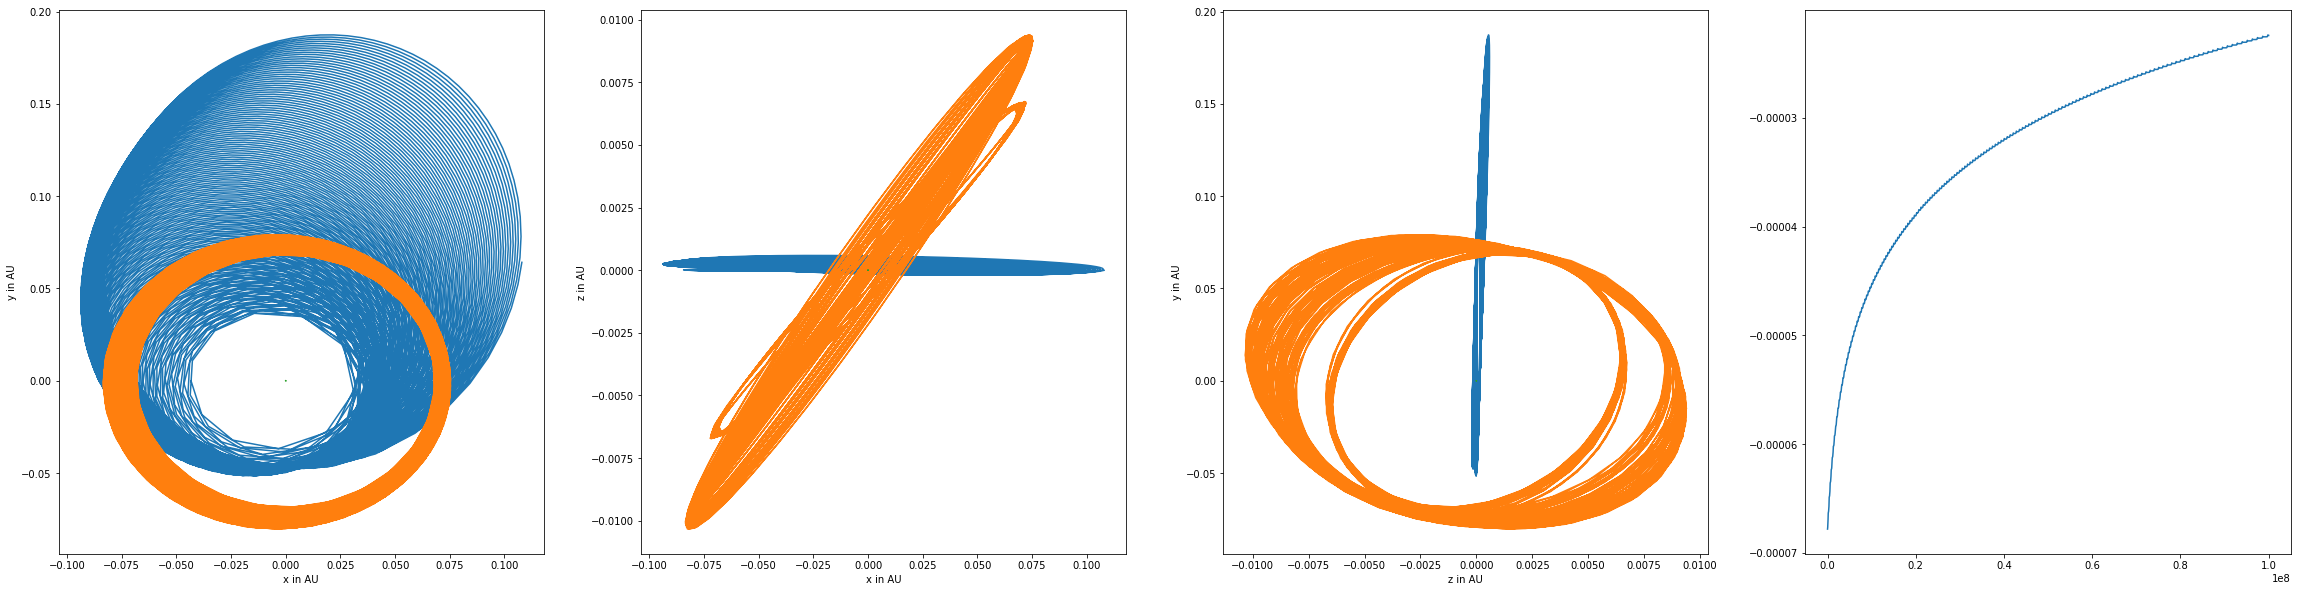

In [148]:
# we'll plot this
fig, ax = plt.subplots(1, 4, figsize=(10*4, 10))

# my X vs. Y plot
# loop over the number of particles in this sim
# coordinate plot
for i in range(r_h.shape[0]):
    ax[0].plot(r_h[i,0,:], r_h[i, 1, :])
# label my axis
ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')
  
# my Z vs. Y plot
# loop over the number of particles in this sim
# coordinate plot
for i in range(r_h.shape[0]): # looping over number of planets
    ax[1].plot(r_h[i,0,:], r_h[i, 2, :])
# label my axis
ax[1].set_xlabel('x in AU')
ax[1].set_ylabel('z in AU')
    
# my Y vs. Z plot
# loop over the number of particles in this sim
# coordinate plot
for i in range(r_h.shape[0]): # looping over number of planets
    ax[2].plot(r_h[i,2,:], r_h[i, 1, :])
# label my axis
ax[2].set_xlabel('z in AU')
ax[2].set_ylabel('y in AU')
     
# energy plot
ax[3].plot(t_h, E_h)

plt.show()

In [149]:
planet_mass

array([0.16, 0.01])

In [150]:
planet_mass2 = np.append(planet_mass, 1.0) # adding in a jupiter

In [153]:
planet_mass2, planet_mass

(array([0.16, 0.01, 1.  ]), array([0.16, 0.01]))

In [109]:
planet_initial_position

array([[-0.0433236 ,  0.        ,  0.        ],
       [ 0.06672647,  0.01359057,  0.00643701]])

In [155]:
planet_initial_position2 = np.append(planet_initial_position, [[0.5, 0, 0]], axis=0)
planet_initial_position2, planet_initial_position

(array([[-0.0433236 ,  0.        ,  0.        ],
        [ 0.06672647,  0.01359057,  0.00643701],
        [ 0.5       ,  0.        ,  0.        ]]),
 array([[-0.0433236 ,  0.        ,  0.        ],
        [ 0.06672647,  0.01359057,  0.00643701]]))

In [156]:
planet_initial_velocity2 = np.append(planet_initial_velocity, [[0.0, 0.5, 0]], axis=0)
planet_initial_velocity2, planet_initial_velocity

(array([[   0.        , -141.87933522,    0.        ],
        [ -24.65587511,  121.05448789,    0.        ],
        [   0.        ,    0.5       ,    0.        ]]),
 array([[   0.        , -141.87933522,    0.        ],
        [ -24.65587511,  121.05448789,    0.        ]]))

In [158]:
r_h2, v_h2, t_h2, E_h2 = do_hermite(star_mass,
                               planet_mass2,
                               planet_initial_position2,
                               planet_initial_velocity2,
                               tfinal=1e8, Nsteps=5000,
                               threeDee=True)

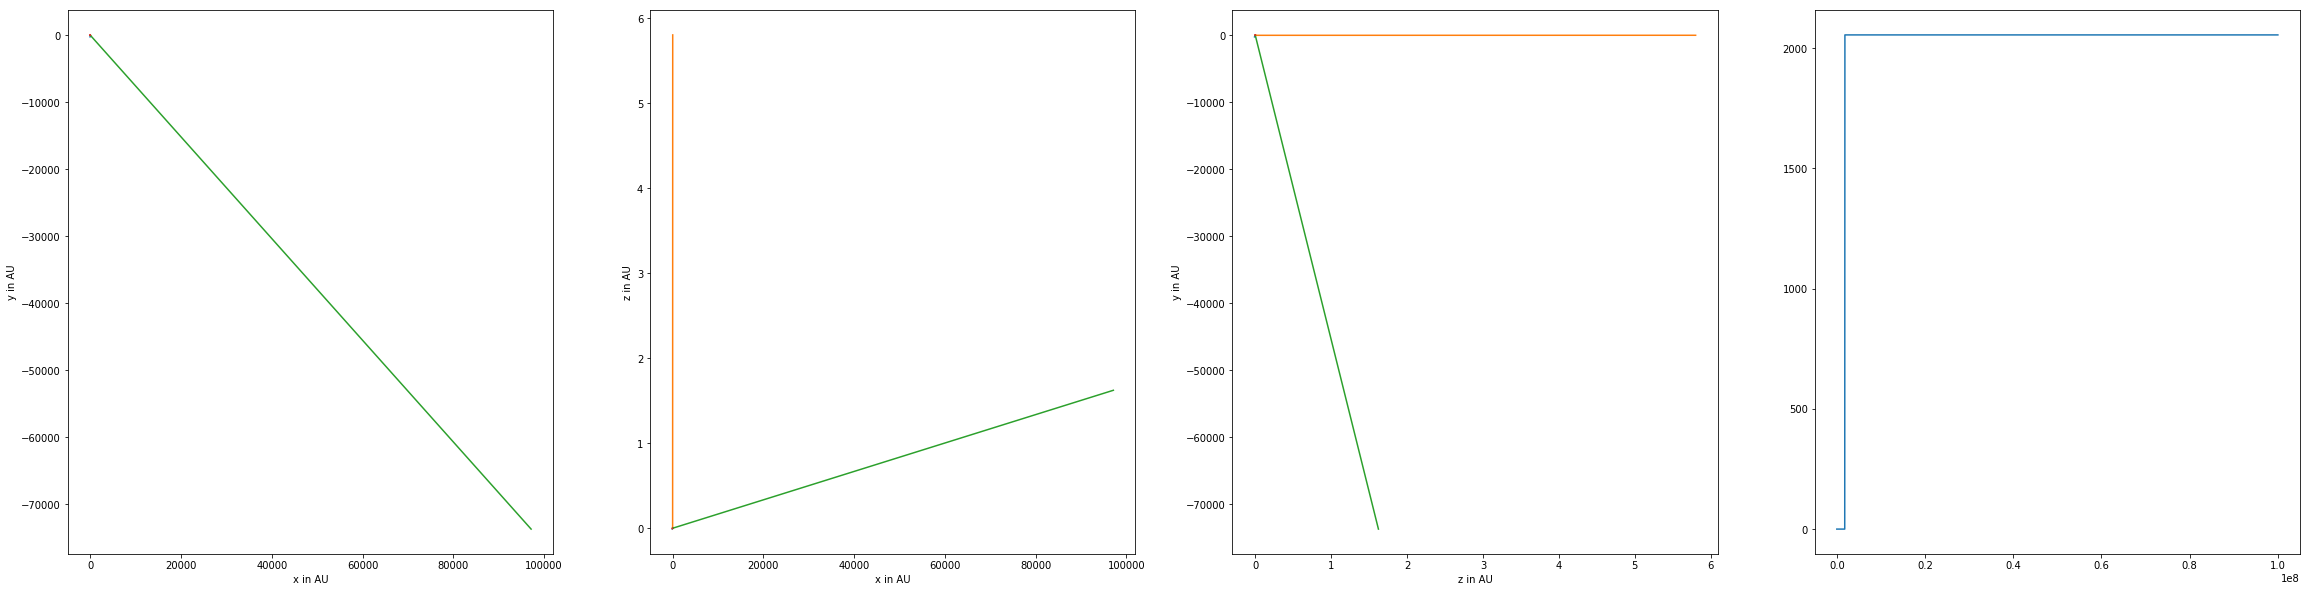

In [159]:
# we'll plot this
fig, ax = plt.subplots(1, 4, figsize=(10*4, 10))

# my X vs. Y plot
# loop over the number of particles in this sim
# coordinate plot
for i in range(r_h2.shape[0]):
    ax[0].plot(r_h2[i,0,:], r_h2[i, 1, :])
# label my axis
ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')
  
# my Z vs. Y plot
# loop over the number of particles in this sim
# coordinate plot
for i in range(r_h2.shape[0]): # looping over number of planets
    ax[1].plot(r_h2[i,0,:], r_h2[i, 2, :])
# label my axis
ax[1].set_xlabel('x in AU')
ax[1].set_ylabel('z in AU')
    
# my Y vs. Z plot
# loop over the number of particles in this sim
# coordinate plot
for i in range(r_h2.shape[0]): # looping over number of planets
    ax[2].plot(r_h2[i,2,:], r_h2[i, 1, :])
# label my axis
ax[2].set_xlabel('z in AU')
ax[2].set_ylabel('y in AU')
     
# energy plot
ax[3].plot(t_h2, E_h2)

plt.show()

# reading data back in

In [160]:
from hermite_library import read_hermite_solution_from_file

In [163]:
t_h, E_h, r_h, v_h = read_hermite_solution_from_file('myPlanetarySystem2.txt')

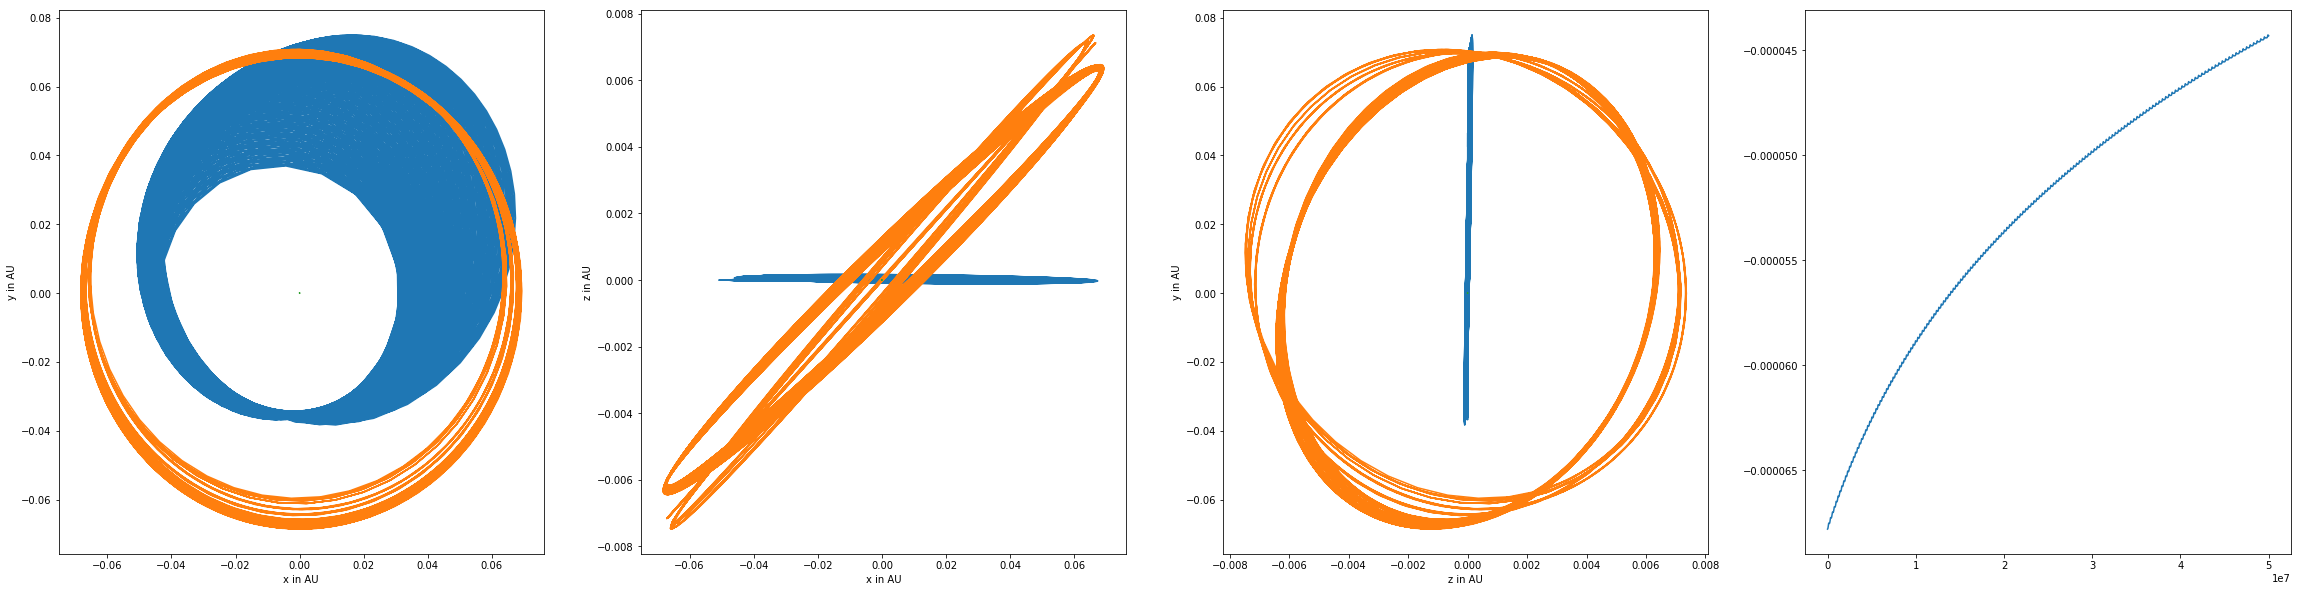

In [165]:
# we'll plot this
fig, ax = plt.subplots(1, 4, figsize=(10*4, 10))

# my X vs. Y plot
# loop over the number of particles in this sim
# coordinate plot
for i in range(r_h.shape[0]):
    ax[0].plot(r_h[i,0,:], r_h[i, 1, :])
# label my axis
ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')
  
# my Z vs. Y plot
# loop over the number of particles in this sim
# coordinate plot
for i in range(r_h.shape[0]): # looping over number of planets
    ax[1].plot(r_h[i,0,:], r_h[i, 2, :])
# label my axis
ax[1].set_xlabel('x in AU')
ax[1].set_ylabel('z in AU')
    
# my Y vs. Z plot
# loop over the number of particles in this sim
# coordinate plot
for i in range(r_h.shape[0]): # looping over number of planets
    ax[2].plot(r_h[i,2,:], r_h[i, 1, :])
# label my axis
ax[2].set_xlabel('z in AU')
ax[2].set_ylabel('y in AU')
     
# energy plot
ax[3].plot(t_h, E_h)

plt.show()